In [1]:
!pip install tensorflow==1.15.0

In [ ]:
# 【問題1】自作データセットでの分類の学習

In [2]:
import numpy  as np
import os
import glob 
import re
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from PIL import Image

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
pwd

'/content'

In [5]:
import os

os.chdir('/content/drive/My Drive/Sprint18')

In [6]:
pwd

'/content/drive/My Drive/Sprint18'

In [8]:
path = './train' 
img_list = os.listdir(path)

In [9]:
!ls -a ./train

cat_1_blur.jpg		    dog_1_compose.jpg
cat_1_compose.jpg	    dog_1_horizontalflip.jpg
cat_1_horizontalflip.jpg    dog_1.jpg
cat_1.jpg		    dog_1_shiftscalerotate.jpg
cat_1_shiftscalerotate.jpg  dog_2_blur.jpg
cat_2_blur.jpg		    dog_2_compose.jpg
cat_2_compose.jpg	    dog_2_horizontalflip.jpg
cat_2_horizontalflip.jpg    dog_2.jpg
cat_2.jpg		    dog_2_shiftscalerotate.jpg
cat_2_shiftscalerotate.jpg  dog_3_blur.jpg
cat_3_blur.jpg		    dog_3_compose.jpg
cat_3_compose.jpg	    dog_3_horizontalflip.jpg
cat_3_horizontalflip.jpg    dog_3.jpg
cat_3.jpg		    dog_3_shiftscalerotate.jpg
cat_3_shiftscalerotate.jpg  dog_4_blur.jpg
cat_4_blur.jpg		    dog_4_compose.jpg
cat_4_compose.jpg	    dog_4_horizontalflip.jpg
cat_4_horizontalflip.jpg    dog_4.jpg
cat_4.jpg		    dog_4_shiftscalerotate.jpg
cat_4_shiftscalerotate.jpg  dog_5_blur.jpg
cat_5_blur.jpg		    dog_5_compose.jpg
cat_5_compose.jpg	    dog_5_horizontalflip.jpg
cat_5_horizontalflip.jpg    dog_5.jpg
cat_5.jpg		    dog_5_shiftscalerotate.jpg
cat

In [10]:
img_list

['dog_2.jpg',
 'dog_5.jpg',
 'dog_3.jpg',
 'dog_4.jpg',
 'cat_1.jpg',
 'cat_2.jpg',
 'cat_4.jpg',
 'cat_5.jpg',
 'cat_3.jpg',
 'dog_1.jpg',
 '.ipynb_checkpoints',
 'dog_1_horizontalflip.jpg',
 'cat_1_horizontalflip.jpg',
 'dog_2_horizontalflip.jpg',
 'cat_2_horizontalflip.jpg',
 'dog_3_horizontalflip.jpg',
 'cat_3_horizontalflip.jpg',
 'dog_4_horizontalflip.jpg',
 'cat_4_horizontalflip.jpg',
 'dog_5_horizontalflip.jpg',
 'cat_5_horizontalflip.jpg',
 'dog_1_shiftscalerotate.jpg',
 'cat_1_shiftscalerotate.jpg',
 'dog_2_shiftscalerotate.jpg',
 'cat_2_shiftscalerotate.jpg',
 'dog_3_shiftscalerotate.jpg',
 'cat_3_shiftscalerotate.jpg',
 'dog_4_shiftscalerotate.jpg',
 'cat_4_shiftscalerotate.jpg',
 'dog_5_shiftscalerotate.jpg',
 'cat_5_shiftscalerotate.jpg',
 'dog_1_blur.jpg',
 'cat_1_blur.jpg',
 'dog_2_blur.jpg',
 'cat_2_blur.jpg',
 'dog_3_blur.jpg',
 'cat_3_blur.jpg',
 'dog_4_blur.jpg',
 'cat_4_blur.jpg',
 'dog_5_blur.jpg',
 'cat_5_blur.jpg',
 'dog_1_compose.jpg',
 'cat_1_compose.jpg',
 'd

In [ ]:
cd train

/content/drive/My Drive/Sprint18/train


In [ ]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)

In [ ]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


In [ ]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.29803922, 0.28627451, 0.2       ],
        [0.31372549, 0.30196078, 0.21960784],
        [0.28627451, 0.27843137, 0.18431373],
        ...,
        [0.59607843, 0.7372549 , 0.11372549],
        [0.6       , 0.74509804, 0.1372549 ],
        [0.67058824, 0.80392157, 0.34117647]],

       [[0.2745098 , 0.26666667, 0.17647059],
        [0.29803922, 0.29803922, 0.20392157],
        [0.28235294, 0.2745098 , 0.18039216],
        ...,
        [0.61568627, 0.75294118, 0.19215686],
        [0.59607843, 0.74117647, 0.20392157],
        [0.6627451 , 0.8       , 0.36862745]],

       [[0.2745098 , 0.2627451 , 0.17254902],
        [0.30980392, 0.30588235, 0.21176471],
        [0.29411765, 0.29411765, 0.19607843],
        ...,
        [0.64313725, 0.77254902, 0.26666667],
        [0.61568627, 0.75294118, 0.2627451 ],
        [0.65490196, 0.79215686, 0.38431373]],

       ...,

       [[0.12941176, 0.12156863, 0.07058824],
        [0.14509804, 0.16470588, 0.07843137],
        [0.35686275, 0

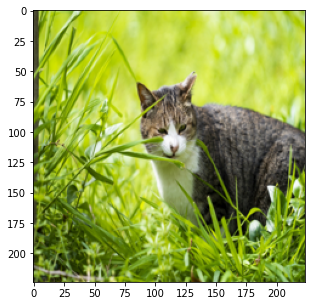

In [ ]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[3])

plt.show()

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [ ]:
img_keras = load_img(img_list[3], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.94509804, 0.94509804, 0.9372549 ],
        [0.9490196 , 0.9529412 , 0.93333334],
        [0.94509804, 0.9490196 , 0.92941177],
        ...,
        [0.88235295, 0.85490197, 0.83137256],
        [0.8862745 , 0.85882354, 0.8352941 ],
        [0.88235295, 0.8627451 , 0.8392157 ]],

       [[0.9490196 , 0.94509804, 0.92941177],
        [0.95686275, 0.9529412 , 0.94509804],
        [0.9490196 , 0.94509804, 0.9372549 ],
        ...,
        [0.8862745 , 0.85490197, 0.84313726],
        [0.8862745 , 0.84705883, 0.8392157 ],
        [0.8862745 , 0.85882354, 0.8352941 ]],

       [[0.95686275, 0.9411765 , 0.92941177],
        [0.9490196 , 0.94509804, 0.9372549 ],
        [0.9490196 , 0.94509804, 0.9372549 ],
        ...,
        [0.88235295, 0.84313726, 0.8352941 ],
        [0.8862745 , 0.84705883, 0.8392157 ],
        [0.8980392 , 0.8627451 , 0.84313726]],

       ...,

       [[0.9490196 , 0.9490196 , 0.9490196 ],
        [0.9411765 , 0.9411765 , 0.9411765 ],
        [0.94509804, 0

<class 'PIL.Image.Image'>


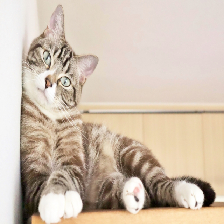

In [ ]:
print(type(img_keras))

img_keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
X = np.concatenate([np.array(dog_img_array), np.array(cat_img_array)], axis=0)

In [ ]:
y = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0 ,0])

In [ ]:
# trainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
K.clear_session()
model = keras.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train, batch_size=1, epochs=20, verbose=1, validation_data=(X_val, y_val))
y_pred = model.predict(X_val)
y_pred_label = np.where(y_pred>=0.5, 1, 0)
print(y_pred_label.reshape(-1))
print(y_val)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 4)       112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 8)       296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 23328)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                233290    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [1]:
## データ数が10では学習ができなかった。

# 【問題2】分類データセットに対するデータ拡張

In [ ]:
cd ../../test

/content/drive/My Drive/Sprint18/test


In [ ]:
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [148]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose, CenterCrop
)

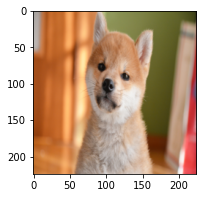

In [ ]:
plt.rcParams['figure.figsize'] = (3.0, 3.0)
plt.imshow(dog_img_array[0])
plt.show()

In [ ]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']

    return image

In [ ]:
#　左右反転
aug = HorizontalFlip(p=1)
for i in range(5):
  im = augment_and_show(aug, dog_img_array[i])
  im *= 255
  pil_img = Image.fromarray(im.astype(np.uint8))
  pil_img.save('dog_{}_horizontalflip.jpg'.format(i+1))
  im = augment_and_show(aug, cat_img_array[i])
  im *= 255
  pil_img = Image.fromarray(im.astype(np.uint8))
  pil_img.save('cat_{}_horizontalflip.jpg'.format(i+1))

In [ ]:
# ランダムに比率を変え回転させる
aug = ShiftScaleRotate(p=1)
for i in range(5):
  im = augment_and_show(aug, dog_img_array[i])
  im *= 255
  pil_img = Image.fromarray(im.astype(np.uint8))
  pil_img.save('dog_{}_shiftscalerotate.jpg'.format(i+1))
  im = augment_and_show(aug, cat_img_array[i])
  im *= 255
  pil_img = Image.fromarray(im.astype(np.uint8))
  pil_img.save('cat_{}_shiftscalerotate.jpg'.format(i+1))

In [ ]:
# ぼやかせる
aug = Blur(blur_limit=10, p=1)
for i in range(5):
  im = augment_and_show(aug, dog_img_array[i])
  im *= 255
  pil_img = Image.fromarray(im.astype(np.uint8))
  pil_img.save('dog_{}_blur.jpg'.format(i+1))
  im = augment_and_show(aug, cat_img_array[i])
  im *= 255
  pil_img = Image.fromarray(im.astype(np.uint8))
  pil_img.save('cat_{}_blur.jpg'.format(i+1))

In [ ]:
# 左右反転とぼやかしを混ぜる
aug = Compose([HorizontalFlip(p=1), Blur(blur_limit=10, p=1)])
for i in range(5):
  im = augment_and_show(aug, dog_img_array[i])
  im *= 255
  pil_img = Image.fromarray(im.astype(np.uint8))
  pil_img.save('dog_{}_compose.jpg'.format(i+1))
  im = augment_and_show(aug, cat_img_array[i])
  im *= 255
  pil_img = Image.fromarray(im.astype(np.uint8))
  pil_img.save('cat_{}_compose.jpg'.format(i+1))

In [ ]:
path = '.' 
img_list = os.listdir(path)

In [ ]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)

In [ ]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(25, 224, 224, 3)  cat_image:(25, 224, 224, 3)


In [ ]:
X = np.concatenate([np.array(dog_img_array), np.array(cat_img_array)], axis=0)

In [ ]:
y = np.concatenate([np.array([1]*25), np.array([0]*25)])

In [ ]:
# trainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
K.clear_session()
model = keras.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train, batch_size=1, epochs=20, verbose=1, validation_data=(X_val, y_val))
y_pred = model.predict(X_val)
y_pred_label = np.where(y_pred>=0.5, 1, 0)
print(y_pred_label.reshape(-1))
print(y_val)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 4)       112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 8)       296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 23328)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                233290    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

# 画像を50枚に拡張したが、うまく学習できなかった。

In [ ]:
cd ../

/content/drive/My Drive/Sprint18


# 【問題3】物体検出データセットの用意

In [11]:
!pip3 install labelImg

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 76.6MB 133kB/s 
     |████████████████████████████████| 286kB 47.0MB/s 


In [12]:
import labelImg

In [13]:
labelImg 

<module 'labelImg' from '/usr/local/lib/python3.6/dist-packages/labelImg/__init__.py'>

In [16]:
cd object_detection/

/content/drive/My Drive/Sprint18/object_detection


In [ ]:
!git clone https://github.com/tzutalin/labelImg.git

Cloning into 'labelImg'...
remote: Enumerating objects: 1588, done.
remote: Total 1588 (delta 0), reused 0 (delta 0), pack-reused 1588
Receiving objects: 100% (1588/1588), 232.62 MiB | 20.77 MiB/s, done.
Resolving deltas: 100% (942/942), done.


In [17]:
cd labelImg

/content/drive/My Drive/Sprint18/object_detection/labelImg


In [18]:
!sudo apt-get install pyqt5-dev-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libqt5designer5 libqt5help5 python3-pyqt5 python3-sip
Suggested packages:
  python3-pyqt5-dbg
The following NEW packages will be installed:
  libqt5designer5 libqt5help5 pyqt5-dev-tools python3-pyqt5 python3-sip
0 upgraded, 5 newly installed, 0 to remove and 33 not upgraded.
Need to get 5,336 kB of archives.
After this operation, 22.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libqt5designer5 amd64 5.9.5-0ubuntu1 [2,761 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libqt5help5 amd64 5.9.5-0ubuntu1 [133 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-sip amd64 4.19.7+dfsg-1ubuntu0.1 [75.3 kB

In [19]:
!sudo pip3 install lxml

In [20]:
!make qt5py3

pyrcc5 -o libs/resources.py resources.qrc


In [21]:
!pip install PyQt5

In [22]:
!pip install lxml

In [25]:
!pip install opencv-python==4.1.2.30  

In [26]:
!pip install opencv-python-headless 

     |████████████████████████████████| 21.6MB 54.0MB/s 


In [27]:
!pyrcc5 -o libs/resources.py resources.qrc

In [28]:
!python labelImg.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, webgl, xcb.



In [30]:
cd ../../

/content/drive/My Drive/Sprint18


In [10]:
annotations = glob.glob('annotation/*' + '.xml')

In [11]:
annotations

['annotation/dog_4.xml',
 'annotation/cat_3.xml',
 'annotation/dog_3.xml',
 'annotation/cat_2.xml',
 'annotation/dog_5.xml',
 'annotation/dog_2.xml',
 'annotation/cat_4.xml',
 'annotation/cat_5.xml',
 'annotation/dog_1.xml',
 'annotation/cat_1.xml']

In [12]:
import xml.etree.ElementTree as ET

In [16]:
tree = ET.parse(annotations[0])
root = tree.getroot()

In [17]:
root

<Element 'annotation' at 0x7fc45d1ff6d8>

In [18]:
for child in root:
    print(child.tag, child.attrib)

folder {}
filename {}
path {}
source {}
size {}
segmented {}
object {}


In [19]:
for child in root:
  for i in child:
    print(i.tag, i.attrib)

database {}
width {}
height {}
depth {}
name {}
pose {}
truncated {}
difficult {}
bndbox {}


In [20]:
for child in root:
  for i in child:
    if i.tag == 'bndbox':
      for j in i:
        print(j.tag)
        print(j.text)

xmin
9
ymin
8
xmax
603
ymax
480


In [22]:
def bndbox(xml_path):
  tree = ET.parse(xml_path)
  root = tree.getroot()
  for child in root:
    bndbox_dict = {}
    for i in child:
      if i.tag == 'bndbox':
        for j in i:
          bndbox_dict[j.tag] = j.text
  
  return bndbox_dict

In [23]:
bndbox(annotations[0])

{'xmax': '603', 'xmin': '9', 'ymax': '480', 'ymin': '8'}

In [24]:
df_annotation = pd.DataFrame(index=np.arange(len(annotations)), columns=['path', 'bndbox'])
for i, annotation in enumerate(annotations):
  bndbox_dict = bndbox(annotation)
  if 'dog' in annotation:
    class_ = '1'
  else:
    class_ = '0'
  bndbox_class = bndbox_dict['xmin'] + ',' + bndbox_dict['ymin'] + ',' + bndbox_dict['xmax']+ ',' + bndbox_dict['ymax'] + ',' + class_
  path = annotation.replace('annotation', 'train')
  path = path.replace('xml', 'jpg')
  df_annotation.loc[i] = [path, bndbox_class]

In [25]:
df_annotation

,path,bndbox
0,train/dog_4.jpg,"9,8,603,480,1"
1,train/cat_3.jpg,"226,100,631,353,0"
2,train/dog_3.jpg,"44,90,476,396,1"
3,train/cat_2.jpg,"161,51,467,385,0"
4,train/dog_5.jpg,"701,101,3541,2945,1"
5,train/dog_2.jpg,"667,399,1971,1799,1"
6,train/cat_4.jpg,"157,80,631,404,0"
7,train/cat_5.jpg,"48,6,615,409,0"
8,train/dog_1.jpg,"33,28,531,395,1"
9,train/cat_1.jpg,"15,30,630,386,0"


In [92]:
df_annotation.to_csv("annotation.txt", sep=" ", header=False, index=False)

# 【問題４】物体検出データセットに対するデータ拡張

In [26]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)
def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(3, 3))
    plt.imshow(img)

In [27]:
path_list = df_annotation['path'].values

In [28]:
class_idx_to_name = {1:'dog', 0:'cat'}

## 一枚の写真だけでやってみる

In [29]:
x_min = int(df_annotation['bndbox'][df_annotation['path']=='train/dog_1.jpg'].values[0].split(',')[0])
y_min = int(df_annotation['bndbox'][df_annotation['path']=='train/dog_1.jpg'].values[0].split(',')[1])
w = int(df_annotation['bndbox'][df_annotation['path']=='train/dog_1.jpg'].values[0].split(',')[2]) - x_min
h = int(df_annotation['bndbox'][df_annotation['path']=='train/dog_1.jpg'].values[0].split(',')[3]) - y_min
class_id = int(df_annotation['bndbox'][df_annotation['path']=='train/dog_1.jpg'].values[0].split(',')[4])

In [30]:
print(x_min, y_min, w, h)

33 28 498 367


In [32]:
annotations = {'image': cv2.cvtColor(cv2.imread('train/dog_1.jpg'), cv2.COLOR_BGR2RGB), 'bboxes': [[x_min, y_min, w, h]], 'category_id':[class_id]}

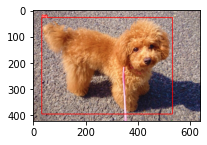

In [33]:
visualize(annotations, class_idx_to_name)

## 全部の写真で行う

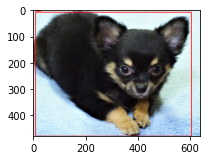

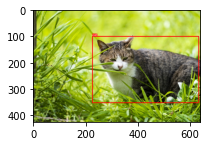

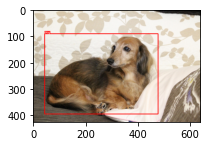

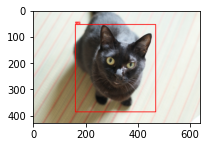

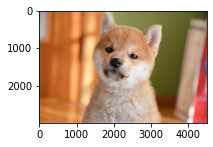

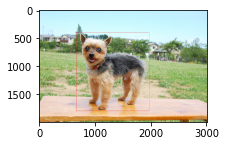

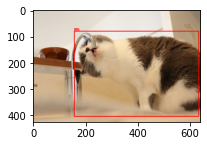

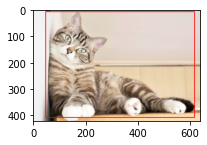

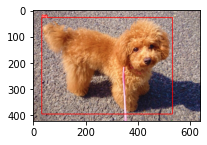

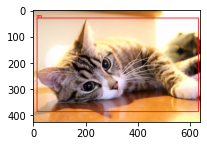

In [34]:
for path in path_list:
  x_min = int(df_annotation['bndbox'][df_annotation['path']==path].values[0].split(',')[0])
  y_min = int(df_annotation['bndbox'][df_annotation['path']==path].values[0].split(',')[1])
  w = int(df_annotation['bndbox'][df_annotation['path']==path].values[0].split(',')[2]) - x_min
  h = int(df_annotation['bndbox'][df_annotation['path']==path].values[0].split(',')[3]) - y_min
  class_id = int(df_annotation['bndbox'][df_annotation['path']==path].values[0].split(',')[4])
  annotations = {'image': cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB), 'bboxes': [[x_min, y_min, w, h]], 'category_id':[class_id]}
  visualize(annotations, class_idx_to_name)

## データ拡張を行う

In [35]:
# colabに初めからインストールされているalbumentationsは古いらしい
!pip install -U albumentations

Requirement already up-to-date: albumentations in /usr/local/lib/python3.6/dist-packages (0.4.5)


In [36]:
from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose,
    BboxParams
)

In [37]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

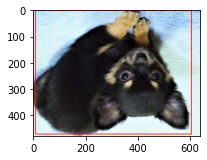

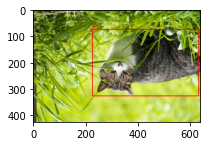

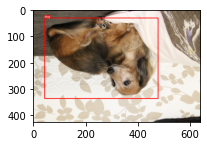

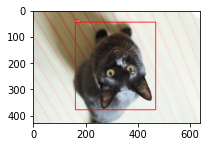

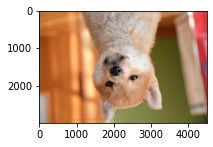

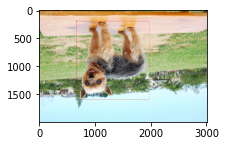

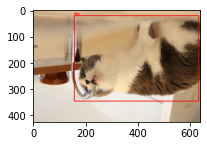

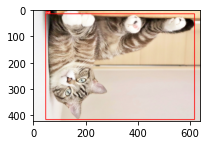

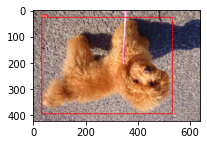

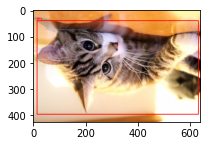

In [39]:
for path in path_list:
  x_min = int(df_annotation['bndbox'][df_annotation['path']==path].values[0].split(',')[0])
  y_min = int(df_annotation['bndbox'][df_annotation['path']==path].values[0].split(',')[1])
  w = int(df_annotation['bndbox'][df_annotation['path']==path].values[0].split(',')[2]) - x_min
  h = int(df_annotation['bndbox'][df_annotation['path']==path].values[0].split(',')[3]) - y_min
  class_id = int(df_annotation['bndbox'][df_annotation['path']==path].values[0].split(',')[4])
  annotations = {'image': cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB), 'bboxes': [[x_min, y_min, w, h]], 'category_id':[class_id]}
  aug = get_aug([VerticalFlip(p=1)])
  augmented = aug(**annotations)
  visualize(augmented, class_idx_to_name)

## 上下反転した写真でもバウンディングボックスをつけることができた